<center> <font color=#3498DB><h2>INICIAMOS EL EDA</h2></font>  <h2>📊</h2> </center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import sys
sys.path.append('../src')
import db_conection

In [3]:
#leer la base de datos
query= "select * from candidates_raw"
dataframe_raw = pd.read_sql(sql=query,con=db_conection.conn())

In [4]:
dataframe_raw.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [5]:
dataframe_raw.shape

(50000, 10)

In [6]:
#miramos que no tengan nulos
print(dataframe_raw.isnull().sum())



First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64


In [7]:
# Verificar si hay filas duplicadas
print(f"Duplicated rows: {dataframe_raw.duplicated().sum()}")

Duplicated rows: 0


In [8]:
#Miramos la distribucion de data
dataframe_raw.describe()

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000000,50000.000000,50000.000000
mean,15.286980,4.996400,5.003880
std,8.830652,3.166896,3.165082
min,0.000000,0.000000,0.000000
25%,8.000000,2.000000,2.000000
50%,15.000000,5.000000,5.000000
75%,23.000000,8.000000,8.000000
max,30.000000,10.000000,10.000000


#Hay una distribución equilibrada en los puntajes de las evaluaciones técnicas, con muchos candidatos #situados en el rango medio.
#La variable de años de experiencia muestra una diversidad significativa en cuanto a los niveles de #experiencia de los candidatos.

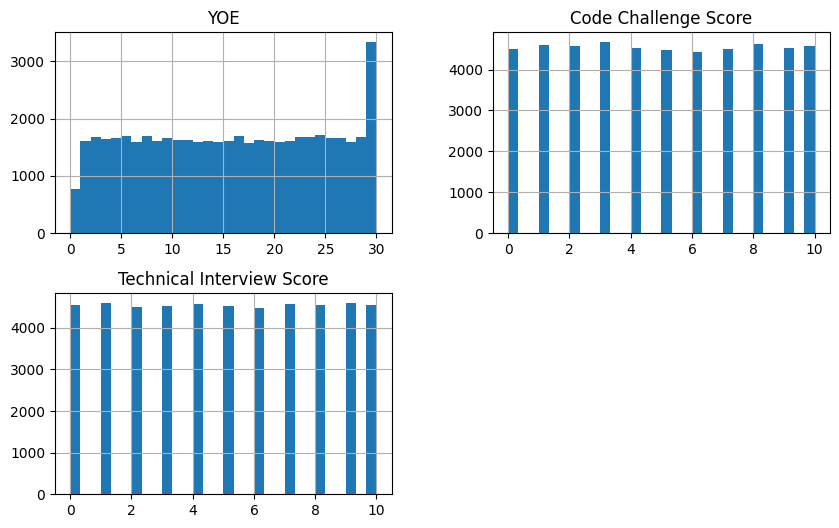

In [9]:
# Visualización de la Distribución de las Variables
dataframe_raw[['YOE', 'Code Challenge Score', 'Technical Interview Score']].hist(bins=30, figsize=(10, 6))
plt.show()


#Esto sugiere que hay un número significativo de candidatos con muchos años de experiencia (30 años)
# los puntajes del desafío de código se distribuyen de manera equitativa entre los candidatos
#Este patrón uniforme puede sugerir problemas con la metodología de evaluación o con la asignación de los puntajes.

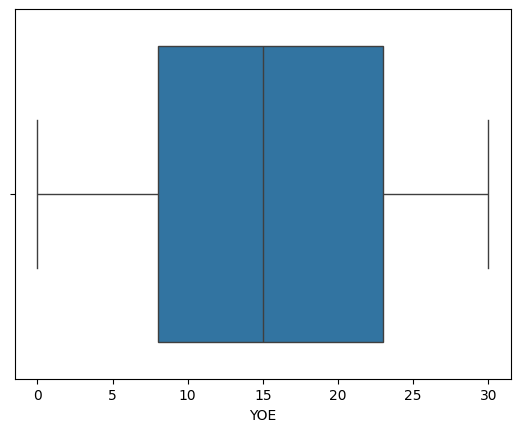

In [10]:
#Ya que hay una gran concentración de candidatos con 30 años de experiencia, se investiga más detalladamente si esos candidatos
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya has cargado tu dataframe:
sns.boxplot(x=dataframe_raw['YOE'])
plt.show()


## la experiencia de los candidatos está bastante equilibrada en términos de la distribución central, sin que haya outliers visibles.

In [11]:
import numpy as np
import numpy as np

# Crear la columna 'hired' basada en la condición de que ambas puntuaciones sean >= 7
dataframe_raw['hired'] = np.where(
    (dataframe_raw['Code Challenge Score'] >= 7) & (dataframe_raw['Technical Interview Score'] >= 7), 
    1, 
    0
)

# Ver las primeras filas del dataframe para verificar la nueva columna
print(dataframe_raw[['Code Challenge Score', 'Technical Interview Score', 'hired']].head())


   Code Challenge Score  Technical Interview Score  hired
0                     3                          3      0
1                     2                         10      0
2                    10                          9      1
3                     7                          1      0
4                     9                          7      1


####CARGAR LA TABLA HIRED

In [12]:
def determine_hire_state(row):
    if row['Code Challenge Score'] >= 7 and row['Technical Interview Score'] >= 7:
        return 1
    else:
        return 0
#create the atribute hired and use the new dataset with the hired colum 
hired_table = dataframe_raw.copy() #copy the original dataset
hired_table["Hired"] = hired_table.apply(determine_hire_state, axis=1).astype(int) #add the colum with the constraint
hired_table.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,hired,Hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1,1


In [13]:
import pandas as pd

# Convertir 'Application Date' a formato datetime, manejando errores y valores nulos
hired_table['Application Date'] = pd.to_datetime(hired_table['Application Date'], errors='coerce')

# Verificar si hay valores nulos después de la conversión
null_dates = hired_table['Application Date'].isnull().sum()
if null_dates > 0:
    print(f"Hay {null_dates} valores en 'Application Date' que no se pudieron convertir a datetime.")

# Crear una nueva columna 'Year' extrayendo el año de 'Application Date'
hired_table['Year'] = hired_table['Application Date'].dt.year

# Verifica las primeras filas para asegurarte de que la columna 'Year' se haya creado correctamente
print(hired_table[['Application Date', 'Year', 'Hired']].head())


  Application Date  Year  Hired
0       2021-02-26  2021      0
1       2021-09-09  2021      0
2       2020-04-14  2020      1
3       2020-10-01  2020      0
4       2020-05-20  2020      1


In [14]:
#Cargar la data en postgres y leerla nuevamente
dataframe_raw.to_sql("hired_candidates" ,con = db_conection.conn(), if_exists="replace", index=False) #load into postgres


1000

In [15]:
get_all_data_hired = f"SELECT * FROM hired_candidates" #The query to get the data for the pd dataframe
hired_candidates = pd.read_sql(get_all_data_hired,con = db_conection.conn())

In [16]:
hired_candidates

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score,hired
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3,0
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10,0
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,1
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1,0
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1,0
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2,0
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1,0
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0,0


In [17]:
hired_candidates.hired.value_counts()

hired
0    43302
1     6698
Name: count, dtype: int64

<center> <font color=#ca47bc><h2>VISUALIZACIONES</h2></font>  <h2>📊</h2> </center>

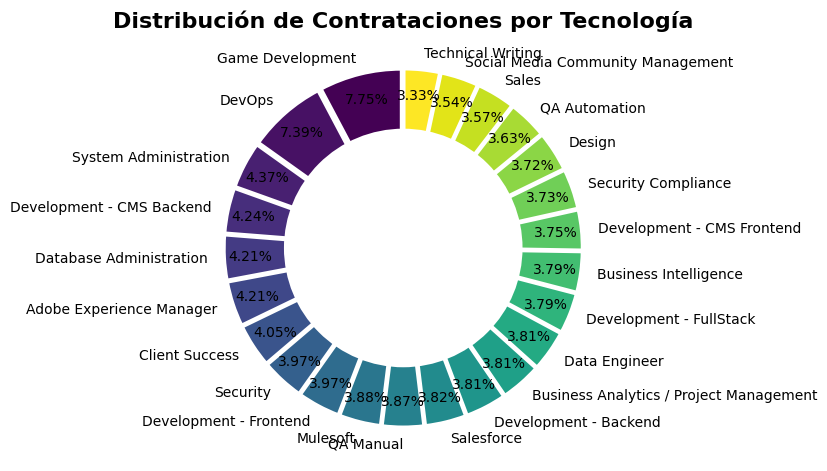

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar solo los candidatos contratados (Hired = 1)
hired_candidates = hired_table[hired_table['Hired'] == 1]

# Contar las contrataciones por tecnología
tech_counts = hired_candidates['Technology'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(tech_counts)))

# Explode para separar un poco las secciones (esto mejora la legibilidad)
explode = [0.05] * len(tech_counts)  # Separar todas las secciones ligeramente

# Crear el gráfico circular con etiquetas desplazadas hacia afuera
plt.pie(tech_counts, labels=tech_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2}, 
        explode=explode, pctdistance=0.85, labeldistance=1.1)

# Añadir un círculo para crear el efecto de un gráfico tipo "donut"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Personalizar el título
plt.title("Distribución de Contrataciones por Tecnología", fontsize=16, fontweight='bold')

# Ajustar la presentación del gráfico
plt.tight_layout()
plt.show()


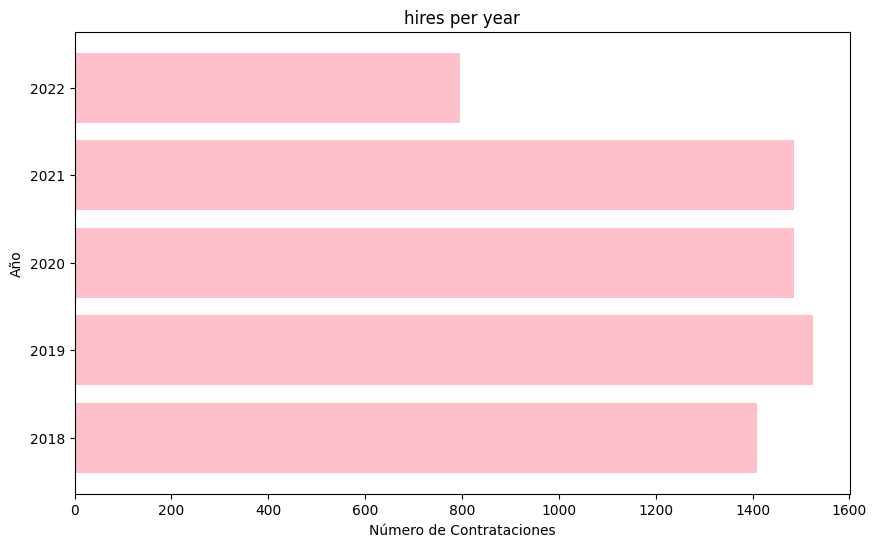

In [27]:
#Contrataciones por año (gráfico de barras horizontales)
import matplotlib.pyplot as plt

# Asegúrate de tener una columna 'Year' en tu hired_table
# Por ejemplo, hired_table['Year'] puede contener los años en los que los candidatos fueron contratados.

# Filtrar solo los candidatos contratados (Hired = 1)
hired_candidates = hired_table[hired_table['Hired'] == 1]

# Contar las contrataciones por año
year_counts = hired_candidates['Year'].value_counts().sort_index()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(year_counts.index, year_counts.values, color='pink')
plt.xlabel('Número de Contrataciones')
plt.ylabel('Año')
plt.title('hires per year')
plt.show()


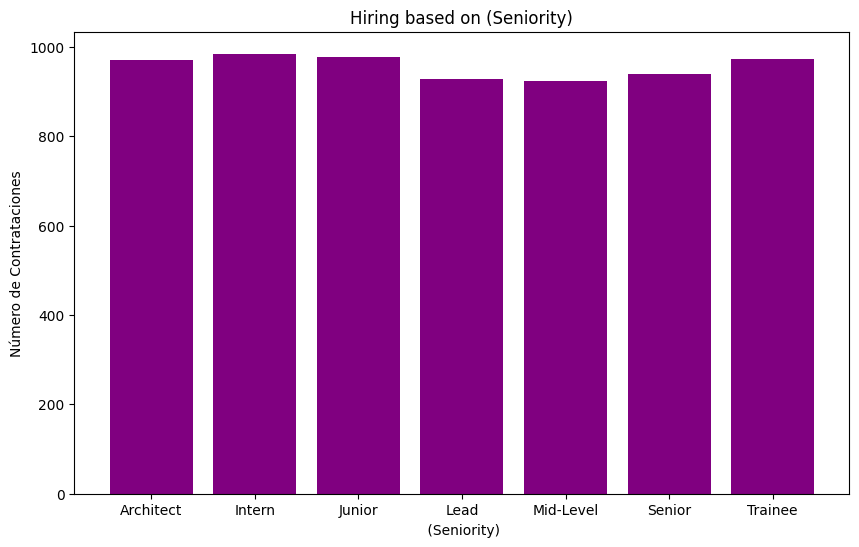

In [31]:
#Contrataciones por antigüedad (gráfico de barras)

import matplotlib.pyplot as plt

# Filtrar solo los candidatos contratados (Hired = 1)
hired_candidates = hired_table[hired_table['Hired'] == 1]

# Contar las contrataciones por años de experiencia (YOE)
yoe_counts = hired_candidates['Seniority'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(yoe_counts.index, yoe_counts.values, color='purple')
plt.xlabel(' (Seniority)')
plt.ylabel('Número de Contrataciones')
plt.title('Hiring based on (Seniority)')
plt.xticks(yoe_counts.index)  # Asegura que todas las etiquetas de antigüedad aparezcan
plt.show()


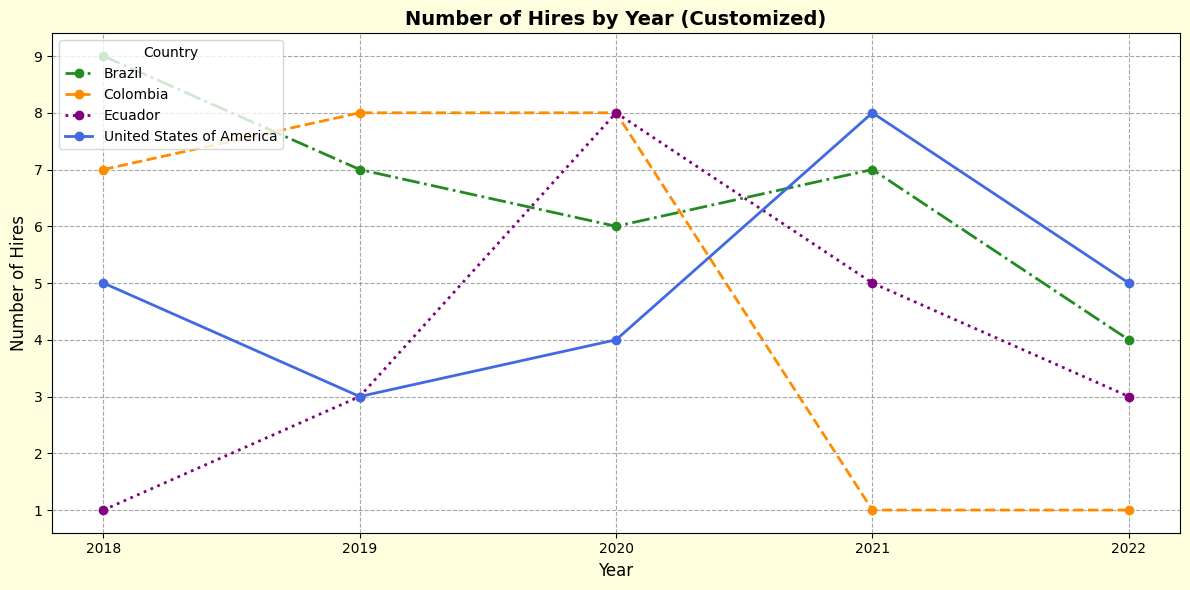

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los países de interés
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
hired_by_country = hired_table[hired_table['Country'].isin(countries_of_interest)]
hired_by_country_h = hired_by_country[hired_by_country['Hired'] == 1]

# Agrupar por año y país, y contar las contrataciones
grouped = hired_by_country_h.groupby(['Year', 'Country']).size().reset_index(name='Count')

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(12, 6))

# Estilos personalizados
colors = {"United States of America": "royalblue", "Brazil": "forestgreen", "Colombia": "darkorange", "Ecuador": "purple"}
line_styles = {"Ecuador": ":", "Brazil": "-.", "Colombia": "--", "United States of America": "-"}

for country in grouped['Country'].unique():
    country_data = grouped[grouped['Country'] == country]
    ax.plot(country_data['Year'], country_data['Count'], label=country, color=colors[country], linestyle=line_styles.get(country, '-'), marker='o', linewidth=2)

# Personalizar el gráfico
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel("Number of Hires", fontsize=12)
ax.set_title('Number of Hires by Year (Customized)', fontsize=14, fontweight='bold')
ax.legend(title="Country", loc='upper left', fontsize=10)
ax.set_xticks(grouped['Year'].unique())
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
fig.set_facecolor("lightyellow")

plt.tight_layout()
plt.show()
